In [ ]:
import os 

In [ ]:
'''!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria -p 'Dataset'''


"!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria -p 'Dataset"

In [ ]:
'''%cd 'Dataset'
! unzip cell-images-for-detecting-malaria.zip'''

"%cd 'Dataset'\n! unzip cell-images-for-detecting-malaria.zip"

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
Parasitized = '/content/Dataset/cell_images/Parasitized/'
Uninfected = '/content/Dataset/cell_images/Uninfected/'
dataset = '/content/Dataset/cell_images/cell_images/'

In [ ]:
#visualize data 
import matplotlib.pyplot as plt
import cv2

Parasitized_data= os.listdir(Parasitized)
Uninfected_data= os.listdir(Uninfected)


In [ ]:
def load_image(path):
    img = cv2.imread(path)
    return img[...,::-1]

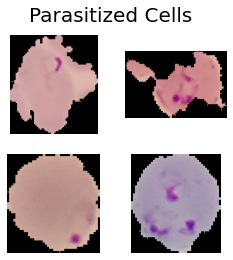

In [ ]:
fig = plt.figure(figsize=(4,4))

for i in range (4):
    plt.subplot(2,2,i+1)
    plt.imshow (load_image(Parasitized+Parasitized_data[i]), cmap='gray')
    plt.suptitle("Parasitized Cells",fontsize=20)
    plt.axis('off')
    
plt.show()

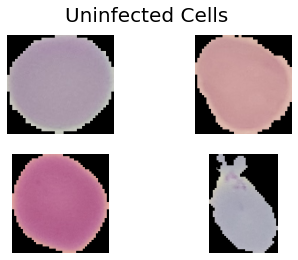

In [ ]:
for i in range (4):
    plt.subplot(2,2,i+1)
    plt.imshow (load_image(Uninfected+Uninfected_data[i]), cmap='gray')
    plt.suptitle("Uninfected Cells",fontsize=20)
    plt.axis('off')
    
plt.show()

In [ ]:
width = 128
height = 128

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#split data + preprocessing in keras
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
train_data= data_generator.flow_from_directory(dataset, target_size=(width,height),class_mode='binary',
                                               batch_size= 32, subset='training',) 

Found 22048 images belonging to 2 classes.


In [ ]:
val_data = data_generator.flow_from_directory(dataset, target_size=(width,height),class_mode='binary',
                                               batch_size= 32, subset='validation',) 

Found 5510 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from keras.models import Model
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Conv2D, Reshape
from tensorflow.keras.optimizers import Adam

In [ ]:
#model 
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)       

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
history = model.fit_generator(train_data, epochs =20, validation_data = val_data,
                             callbacks=[early_stop])

Epoch 1/20
689/689 [==============================] - 35s 51ms/step - loss: 0.5621 - accuracy: 0.7045 - val_loss: 0.2988 - val_accuracy: 0.8971
Epoch 2/20
689/689 [==============================] - 34s 49ms/step - loss: 0.2269 - accuracy: 0.9314 - val_loss: 0.1701 - val_accuracy: 0.9354
Epoch 3/20
689/689 [==============================] - 34s 49ms/step - loss: 0.1719 - accuracy: 0.9483 - val_loss: 0.1901 - val_accuracy: 0.9423
Epoch 4/20
689/689 [==============================] - 33s 48ms/step - loss: 0.1513 - accuracy: 0.9549 - val_loss: 0.2014 - val_accuracy: 0.9368


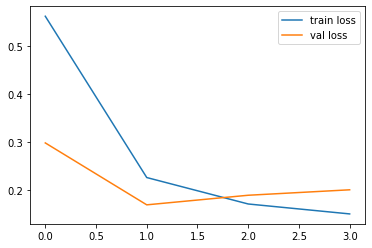

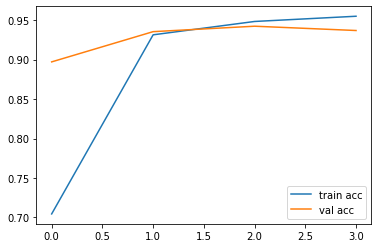

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save("/content/drive/My Drive/Colab Notebooks/Malaria_Detection&Deployment/model.h5",)